# Computer Assignment 0

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.warnings.filterwarnings('ignore')

## Part 1: Loading the dataset

In [2]:
df = pd.read_csv('bank_term_deposit.csv')

### Info
The info() method prints information about the DataFrame. The information contains the **number of columns**, **column labels**, **column data types**, **memory usage**, **range index**, and the **number of cells** in each column (non-null values).

This function is useful for finding which column has missing values. For example age column has $ 4521 - 3984 = 537$ missing values. 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


In [4]:
# How many data points exist in this data set?
len(df)

4521

### Head
The head() method prints the top n-rows of a Pandas DataFrame (which by default n = 5).


In [5]:
df.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no


### Tail
The tail() method prints the bottom n-rows of a Pandas DataFrame (which by default n = 5).


In [6]:
df.tail()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


### Describe
The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

*   **count**: The number of not-empty values.
*   **mean**: The average (mean) value.
*   **std**: The standard deviation.
*   **min**: The minimum value.
*   **max**: The maximum value.
*   **25%**: The 25% percentile*.
*   **50%**: The 50% percentile*.
*   **75%**: The 75% percentile*.


In [7]:
df.describe()

,age,balance,duration,campaign,pdays
count,3984.000000,4164.000000,4388.000000,4521.000000,4521.000000
mean,41.617470,1136.750240,264.724020,2.793630,39.766645
std,10.696378,2726.204918,261.057119,3.109807,100.121124
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,32.000000,58.000000,104.000000,1.000000,-1.000000
50%,40.000000,316.000000,185.500000,2.000000,-1.000000
75%,49.000000,997.000000,331.000000,3.000000,-1.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000


In [8]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

## Part 2: Dealing with non-numerical values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


In [10]:
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category')
df['poutcome'] = df['poutcome'].astype('category')
df['y'] = df['y'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        3984 non-null   float64 
 1   job        4521 non-null   category
 2   marital    4401 non-null   category
 3   education  4521 non-null   category
 4   balance    4164 non-null   float64 
 5   housing    4302 non-null   category
 6   loan       4521 non-null   category
 7   duration   4388 non-null   float64 
 8   campaign   4521 non-null   int64   
 9   pdays      4521 non-null   int64   
 10  poutcome   4521 non-null   category
 11  y          4087 non-null   category
dtypes: category(7), float64(3), int64(2)
memory usage: 208.9 KB


In [12]:
new_df = df.copy()

In [13]:
new_df['job'] = df['job'].cat.codes
new_df['marital'] = df['marital'].cat.codes
new_df['education'] = df['education'].cat.codes
new_df['poutcome'] = df['poutcome'].cat.codes

In [14]:
bool_dict = {'no': 0, 'yes': 1}
new_df['housing'] = df['housing'].replace(bool_dict)
new_df['loan'] = df['loan'].replace(bool_dict)
new_df['y'] = df['y'].replace(bool_dict)

In [15]:
new_df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,10,1,0,1787.0,0.0,0,79.0,1,-1,3,0.0
1,33.0,7,1,1,4789.0,1.0,1,NaN,1,339,0,0.0
2,NaN,4,2,2,135.0,1.0,0,185.0,1,330,0,0.0
3,30.0,4,1,2,1476.0,1.0,1,199.0,4,-1,3,0.0
4,59.0,1,1,1,NaN,1.0,0,226.0,1,-1,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,7,1,1,-333.0,1.0,0,329.0,5,-1,3,0.0
4517,57.0,6,1,2,-3313.0,1.0,1,153.0,1,-1,3,0.0
4518,57.0,9,1,1,295.0,0.0,0,151.0,11,-1,3,0.0
4519,28.0,1,1,1,1137.0,0.0,0,129.0,4,211,1,0.0


## Part 3: Dealing with missing values

Here's a pros and cons of replacing missing values with the mean of the column:
**Pros:**
*   This is a better approach when the data size is small
*   It can prevent data loss which results in removal of the rows and columns


**Cons:**
*   Imputing the approximations add variance and bias
*   Works poorly compared to other multiple-imputations method

In [16]:
new_df.isnull().sum()

age          537
job            0
marital        0
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

Text(0, 0.5, 'Missing Values')

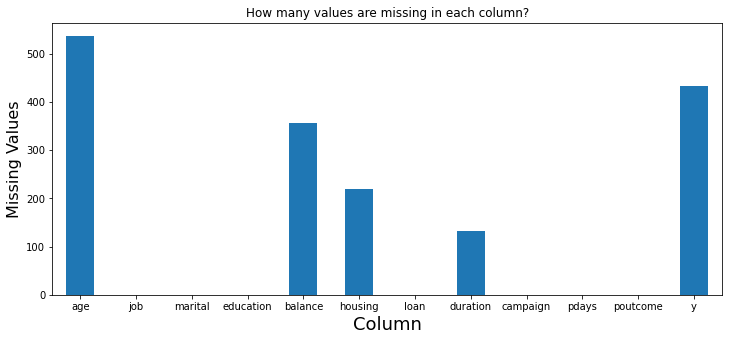

In [17]:
plt.figure(figsize=(12,5))
ax = new_df.isnull().sum().plot.bar(x='lab', y='val', rot=0)
plt.title('How many values are missing in each column?')
plt.xlabel('Column', fontsize=18)
plt.ylabel('Missing Values', fontsize=16)

Here, we're going to replace NaN values of other columns with its mean.

In [18]:
new_df['age'].fillna(value=new_df['age'].mean(),inplace=True)
new_df['balance'].fillna(value=new_df['balance'].mean(),inplace=True)
new_df['duration'].fillna(value=new_df['duration'].mean(),inplace=True)

Since housing column is a binary feature, we can't just replace it with the mean value. Here, we're going to replace NaN values of housing column with 1.

In [19]:
new_df['housing'].value_counts()

1.0    2435
0.0    1867
Name: housing, dtype: int64

In [20]:
new_df['marital'].value_counts()

 1    2728
 2    1161
 0     512
-1     120
Name: marital, dtype: int64

In [21]:
new_df['housing'].fillna(value=1, inplace=True)

In [22]:
new_df.isnull().sum()

age            0
job            0
marital        0
education      0
balance        0
housing        0
loan           0
duration       0
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

## Part 4

In [23]:
df['housing'].value_counts()

yes    2435
no     1867
Name: housing, dtype: int64

Text(0, 0.5, 'Count')

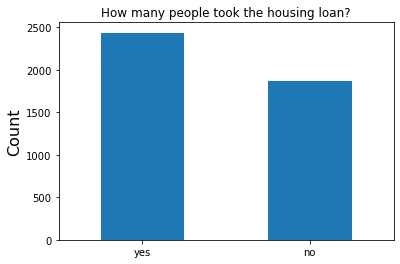

In [24]:
ax = df['housing'].value_counts().plot.bar(x='lab', y='val', rot=0)
plt.title('How many people took the housing loan?')
plt.ylabel('Count', fontsize=16)

In [25]:
df['y'].value_counts()

no     3623
yes     464
Name: y, dtype: int64

Text(0, 0.5, 'Count')

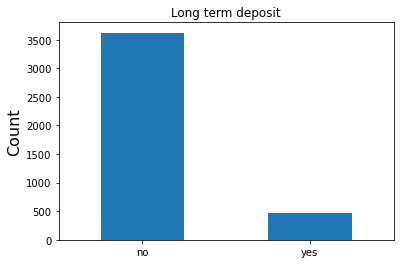

In [26]:
ax = df['y'].value_counts().plot.bar(x='lab', y='val', rot=0)
plt.title('Long term deposit')
plt.ylabel('Count', fontsize=16)

# Part 5

Note that the categorical code for divorced, married, and single status are 0,1, and 2 respectively. There are **14 records** that statisfies the mentioned conditions.

In [27]:
df['marital'].cat.categories

Index(['divorced', 'married', 'single'], dtype='object')

In [28]:
df['poutcome'].cat.categories

Index(['failure', 'other', 'success', 'unknown'], dtype='object')

In [29]:
len(new_df[(new_df['age'] > 35) & (new_df['marital'] == 2) & (new_df['poutcome'] == 2)])

15

# Part 6
The mean balance is 949.419.

In [30]:
df['education'].cat.categories

Index(['primary', 'secondary', 'tertiary', 'unknown'], dtype='object')

In [31]:
%%time
new_df[new_df['education'] == 1]['balance'].mean()

CPU times: user 2.33 ms, sys: 1.46 ms, total: 3.8 ms
Wall time: 2.43 ms


956.3408674526528

# Part 7: Without vectorization
It takes 2.49ms to run the code with vectorization. But without any vectorization, it took longer to run(624 ms!!).

In [32]:
%%time
balance_sum = 0
count = 0
for i in range(0, len(new_df)):
    if new_df.iloc[i]['education'] == 1:
        balance_sum += new_df.iloc[i]['balance']
        count += 1
mean = balance_sum/count
print(f'The mean value is {mean}')

The mean value is 956.3408674526528
CPU times: user 646 ms, sys: 4.72 ms, total: 651 ms
Wall time: 652 ms


# Part 8

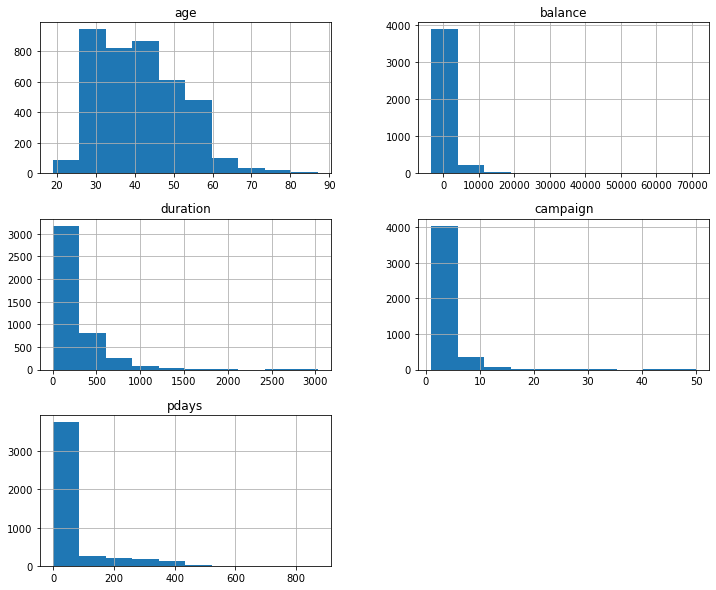

In [33]:
hist = df.hist(figsize=(12,10))

# Part 9: Normalize

In [34]:
def normalize(data):
    mean = data.mean()
    std = data.std()
    return (data-mean)/std

In [35]:
new_df['age'] = normalize(new_df['age'])
new_df['balance'] = normalize(new_df['balance'])
new_df['duration'] = normalize(new_df['duration'])
new_df['campaign'] = normalize(new_df['campaign'])
new_df['pdays'] = normalize(new_df['pdays'])

In [36]:
test = new_df[new_df['y'].isnull()].copy()

In [37]:
test['age'].fillna(value=new_df['age'].mean(),inplace=True)
test['balance'].fillna(value=new_df['balance'].mean(),inplace=True)
test['duration'].fillna(value=new_df['duration'].mean(),inplace=True)

In [38]:
test

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,7.352458e-01,9,1,2,0.037553,0.0,0,3.471239e-01,0.066361,-0.407173,3,NaN
38,-8.582367e-01,4,1,1,1.069533,1.0,0,1.945179e+00,-0.576766,3.018677,0,NaN
54,1.981415e-14,1,1,1,0.418238,1.0,0,2.829055e-02,0.066361,-0.407173,3,NaN
65,9.344311e-01,1,0,1,-0.425692,1.0,0,-5.082826e-01,-0.576766,1.300758,0,NaN
89,1.981415e-14,1,1,1,0.265353,1.0,0,-2.399960e-01,-0.255202,-0.407173,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,-1.057422e+00,9,2,2,0.011180,1.0,0,-2.244432e-01,-0.576766,-0.407173,3,NaN
4471,1.731172e+00,4,1,3,0.916264,0.0,0,-1.894493e-01,0.387925,-0.407173,3,NaN
4473,-8.582367e-01,9,1,1,-0.251402,1.0,0,-4.966180e-01,-0.576766,2.319524,0,NaN
4477,-9.578294e-01,4,2,2,-0.213945,0.0,0,-6.365936e-01,-0.255202,-0.407173,3,NaN


Here, we're going to remove rows that their target is NaN. We're going to use them as test set.

In [39]:
new_df = new_df.dropna(subset=['y'])

# Part 10

Here, we're going to divide the dataframe into 2 dataframes, one contains positive target and one contains negative target.

In [40]:
positive_df = new_df[new_df['y'] == 1]
negative_df = new_df[new_df['y'] == 0]
positive_df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
13,-2.152941,8,2,1,-0.414608,0.0,0,-0.014480,-0.576766,-0.407173,3,1.0
30,2.627506,5,0,1,1.166615,0.0,0,2.458423,-0.255202,-0.407173,3,1.0
33,-0.957829,4,2,2,0.534814,1.0,0,2.695604,1.031051,-0.407173,3,1.0
36,3.623433,5,0,0,-0.346956,0.0,0,-0.652146,-0.576766,-0.407173,3,1.0
37,-0.957829,1,1,1,-0.324023,1.0,0,-0.516059,-0.576766,-0.407173,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4494,-1.555385,9,2,1,-0.179163,1.0,0,1.210307,0.066361,-0.407173,3,1.0
4503,1.830765,6,1,0,-0.296121,0.0,1,2.143478,1.031051,-0.407173,3,1.0
4504,0.038097,1,2,1,-0.427603,1.0,1,2.668386,0.066361,3.298338,0,1.0
4505,-0.957829,0,2,1,-0.410785,1.0,0,3.768750,0.066361,-0.407173,3,1.0


In [41]:
def draw_diagram(mu_positive,sigma_positive, mu_negative, sigma_negative,column_name):
    mu = mu_positive
    sigma = sigma_positive
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))

    mu = mu_negative
    sigma = sigma_negative
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))

    plt.legend(['Postive', 'Negative'], loc='upper left')
    plt.title(f'Postive vs. Negative Target in {column_name}')
    plt.show()

## Age

This column has a low difference of mean values in 0 and 1 classes and high variance in both classes as well. So this column is not a good choice.

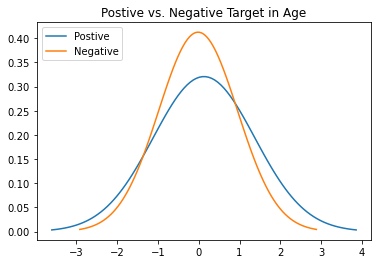

In [42]:
positive_mu_age = positive_df['age'].mean()
positive_std_age = positive_df['age'].std()

negative_mu_age = negative_df['age'].mean()
negative_std_age = negative_df['age'].std()
draw_diagram(positive_mu_age,positive_std_age,negative_mu_age,negative_std_age,'Age')

In [43]:
print('Column Name: Age')
print('Mean difference: ',abs(positive_mu_age - negative_mu_age))
print('std positive: ', positive_std_age,'std negative: ', negative_std_age)

Column Name: Age
Mean difference:  0.14378185308679126
std positive:  1.243621879574519 std negative:  0.9666343765199411


## Balance
This column has the lowest difference of mean values in 0 and 1 classes and high variance in both classes as well. So this column is not a good choice.

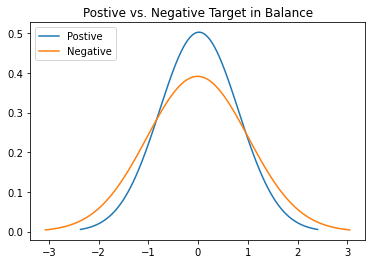

In [44]:
positive_mu_balance = positive_df['balance'].mean()
positive_std_balance = positive_df['balance'].std()

negative_mu_balance = negative_df['balance'].mean()
negative_std_balance = negative_df['balance'].std()

draw_diagram(positive_mu_balance,positive_std_balance,negative_mu_balance,negative_std_balance,'Balance')

In [45]:
print('Column Name: Balance')
print('Mean difference: ',abs(positive_mu_balance - negative_mu_balance))
print('std positive: ', positive_std_balance,'std negative: ', negative_std_balance)

Column Name: Balance
Mean difference:  0.028517030433160166
std positive:  0.7941521531675242 std negative:  1.0199960940761061


## Duration

This column has the highest difference of mean values in 0 and 1 classes. So this column is the best one to choose.

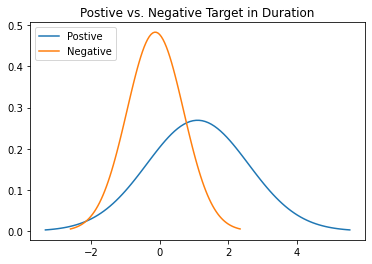

In [46]:
positive_mu_duration = positive_df['duration'].mean()
positive_std_duration = positive_df['duration'].std()

negative_mu_duration = negative_df['duration'].mean()
negative_std_duration = negative_df['duration'].std()

draw_diagram(positive_mu_duration,positive_std_duration,negative_mu_duration,negative_std_duration,'Duration')

In [47]:
print('Column Name: Duration')
print('Mean difference: ',abs(positive_mu_duration - negative_mu_duration))
print('std positive: ', positive_std_duration,'std negative: ', negative_std_duration)

Column Name: Duration
Mean difference:  1.2365092213475855
std positive:  1.4821193281268374 std negative:  0.8258232315530994


## Campaign

This column has a low difference of mean values in 0 and 1 classes and high variance in both classes as well. So this column is not a good choice.

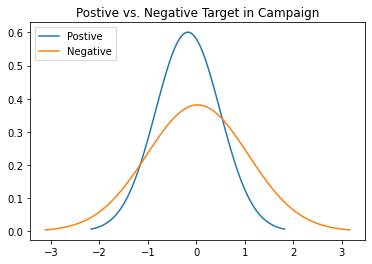

In [48]:
positive_mu_campaign = positive_df['campaign'].mean()
positive_std_campaign = positive_df['campaign'].std()

negative_mu_campaign = negative_df['campaign'].mean()
negative_std_campaign = negative_df['campaign'].std()

draw_diagram(positive_mu_campaign,positive_std_campaign,negative_mu_campaign,negative_std_campaign,'Campaign')

In [49]:
print('Column Name: Campaign')
print('Mean difference: ',abs(positive_mu_campaign - negative_mu_campaign))
print('std positive: ', positive_std_campaign,'std negative: ', negative_std_campaign)

Column Name: Campaign
Mean difference:  0.20043349320360143
std positive:  0.6638036831361747 std negative:  1.0456746706446718


## Pdays

This column has a low difference of mean values in 0 and 1 classes and high variance in both classes as well. So this column is not a good choice.

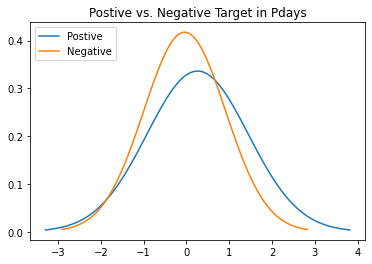

In [50]:
positive_mu_pdays = positive_df['pdays'].mean()
positive_std_pdays = positive_df['pdays'].std()

negative_mu_pdays = negative_df['pdays'].mean()
negative_std_pdays = negative_df['pdays'].std()

draw_diagram(positive_mu_pdays,positive_std_pdays,negative_mu_pdays,negative_std_pdays,'Pdays')

In [51]:
print('Column Name: PDays')
print('Mean difference: ',abs(positive_mu_pdays - negative_mu_pdays))
print('std positive: ', positive_std_pdays,'std negative: ', negative_std_pdays)

Column Name: PDays
Mean difference:  0.3028186502220774
std positive:  1.186072743572173 std negative:  0.9549927730758819


## Which feature can seperate these 2 classes better?

The criteria for selecting the best column for seperation of these two classes are:
*   Biggest difference of mean value
*   Low variance

Duration column satisfies the above condition.

# Part 11: Classification

In [52]:
def predict(duration):
    positive_prob = stats.norm.pdf(duration, positive_mu_duration, positive_std_duration)
    negative_prob = stats.norm.pdf(duration, negative_mu_duration, negative_std_duration)

    if positive_prob > negative_prob:
        return 'yes'
    else:
        return 'no'

In [62]:
predict(test.iloc[0]['duration'])

'no'

In [64]:
test['y'] = test['duration'].apply(predict)

In [66]:
test['y'].value_counts()

no     379
yes     55
Name: y, dtype: int64

In [68]:
test['y'].to_csv('prediction.csv', encoding='utf-8')